<image src="https://i.imgur.com/HrRxc5o.jpeg" width=100%>

Existen tres tipos principales de segmentaci√≥n en visi√≥n por computadora: **segmentaci√≥n sem√°ntica**, **segmentaci√≥n por instancia** y **segmentaci√≥n pan√≥ptica**. La segmentaci√≥n sem√°ntica clasifica cada p√≠xel de una imagen seg√∫n su categor√≠a (por ejemplo, ‚Äú√°rbol‚Äù o ‚Äúcarretera‚Äù), sin distinguir entre diferentes objetos individuales de la misma clase. La segmentaci√≥n por instancia identifica objetos individuales dentro de una misma categor√≠a, como distinguir entre varios ‚Äúautos‚Äù en una escena. Finalmente, la segmentaci√≥n pan√≥ptica combina ambos enfoques, asignando a cada p√≠xel una etiqueta sem√°ntica y, cuando corresponde, una instancia √∫nica del objeto.

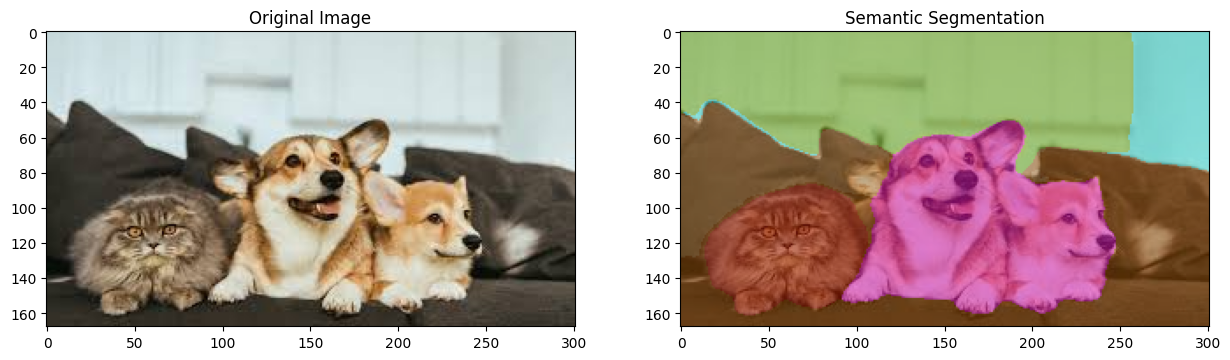

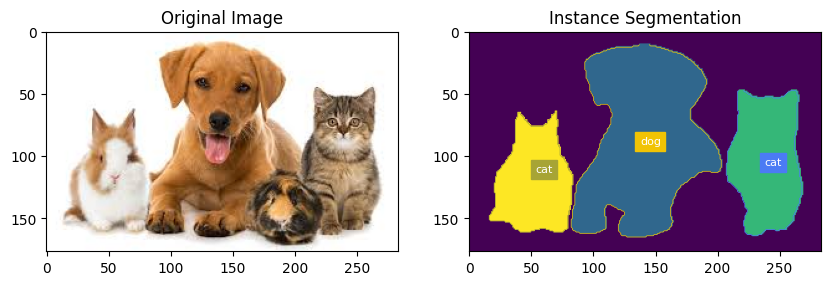

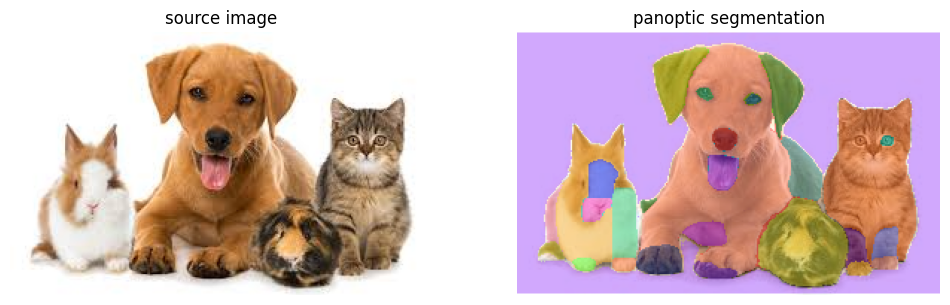

# <font color='#00FFFF'>**Diferentes tipos de Segmentaci√≥n üëÄ**</font>

### **Importamos librer√≠as y dependencias**

In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git' --q
!pip install jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0 --q

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 151.5/151.5 kB 8.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.3/85.3 kB 7.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.9/49.9 MB 15.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 220.7/220.7 kB 19.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ‚î

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from google.colab import files
import os
from PIL import Image
import torch
import cv2
import random
import json
import supervision as sv
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

## <font color='#00FFFF'> **1. Segmentaci√≥n pan√≥ptica** </font>





### **Descargamos y configuramos SAM pre-entrenado listo para usarse**

In [ ]:
#No modifiques esta secci√≥n

In [ ]:
!mkdir -p /content/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P /content//weights

In [ ]:
checkpoint = os.path.join("/content", "weights", "sam_vit_h_4b8939.pth")
print(checkpoint, "; exist:", os.path.isfile(checkpoint))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = "vit_h"

sam = sam_model_registry[model](checkpoint=checkpoint).to(device=device)

### **Sube cualquier imagen o im√°genes aqu√≠ para trabajar**

In [ ]:
uploaded = files.upload()
image_paths = []

for fn in uploaded.keys():
  if not os.path.exists('uploaded_images'):
    os.makedirs('uploaded_images')

  path = os.path.join('uploaded_images', fn)
  image_paths.append(path)

  with open(path, 'wb') as f:
    f.write(uploaded[fn])

  print('User uploaded file "{name}" with length {length} bytes and saved to {path}'.format(
      name=fn, length=len(uploaded[fn]), path=path))

# Guardamos los paths de cada image en image_path, descomenta la l√≠nea de abajo para verlos
#print("Saved image paths:", image_paths)

Saving images (1).jpg to images (1).jpg
User uploaded file "images (1).jpg" with length 7374 bytes and saved to uploaded_images/images (1).jpg


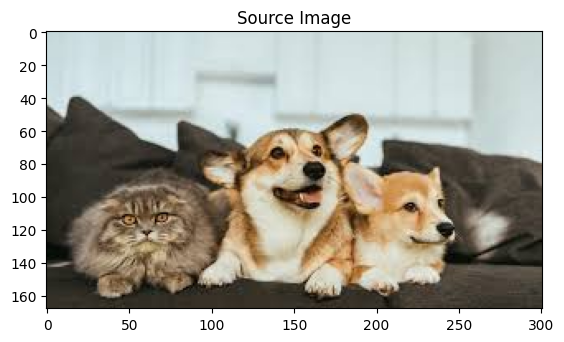

In [ ]:
# La posici√≥n del path depende del orden de subida de las imagenes a trabajar, si deseas cambiar la imagen,
# modifica el √≠ndice de la lista al path de la imagen a usar, no olvidar que los √≠ndices empiezan hasta 0
# y van hasta n-1 donde n es el n√∫mero de im√°genes

image_path = image_paths[0]
src_image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Source Image')
plt.show() #Visualizaci√≥n de la imagen seleccionada

### **Creaci√≥n de m√°scaras y visualizaci√≥n de Segmentaci√≥n Pan√≥ptica**

In [ ]:
# Crear las m√°scaras usando SAM a partir de la imagen RGB

mask_generator = SamAutomaticMaskGenerator(sam)
src_image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
sam_result = mask_generator.generate(image_rgb)

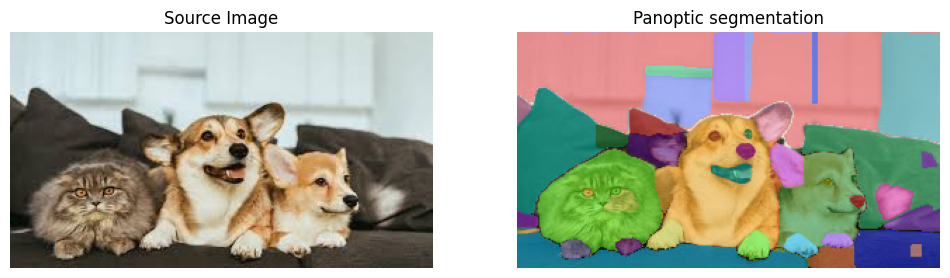

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(sam_result=sam_result)
annotated_image = mask_annotator.annotate(scene=src_image.copy(), detections=detections)

#Visualizaci√≥n de las im√°genes
sv.plot_images_grid(
    images=[src_image, annotated_image],
    grid_size=(1, 2),
    titles=['Source Image', 'Panoptic segmentation']
)

### **Visualizaci√≥n de m√°scaras de segmentaci√≥n generadas por SAM**

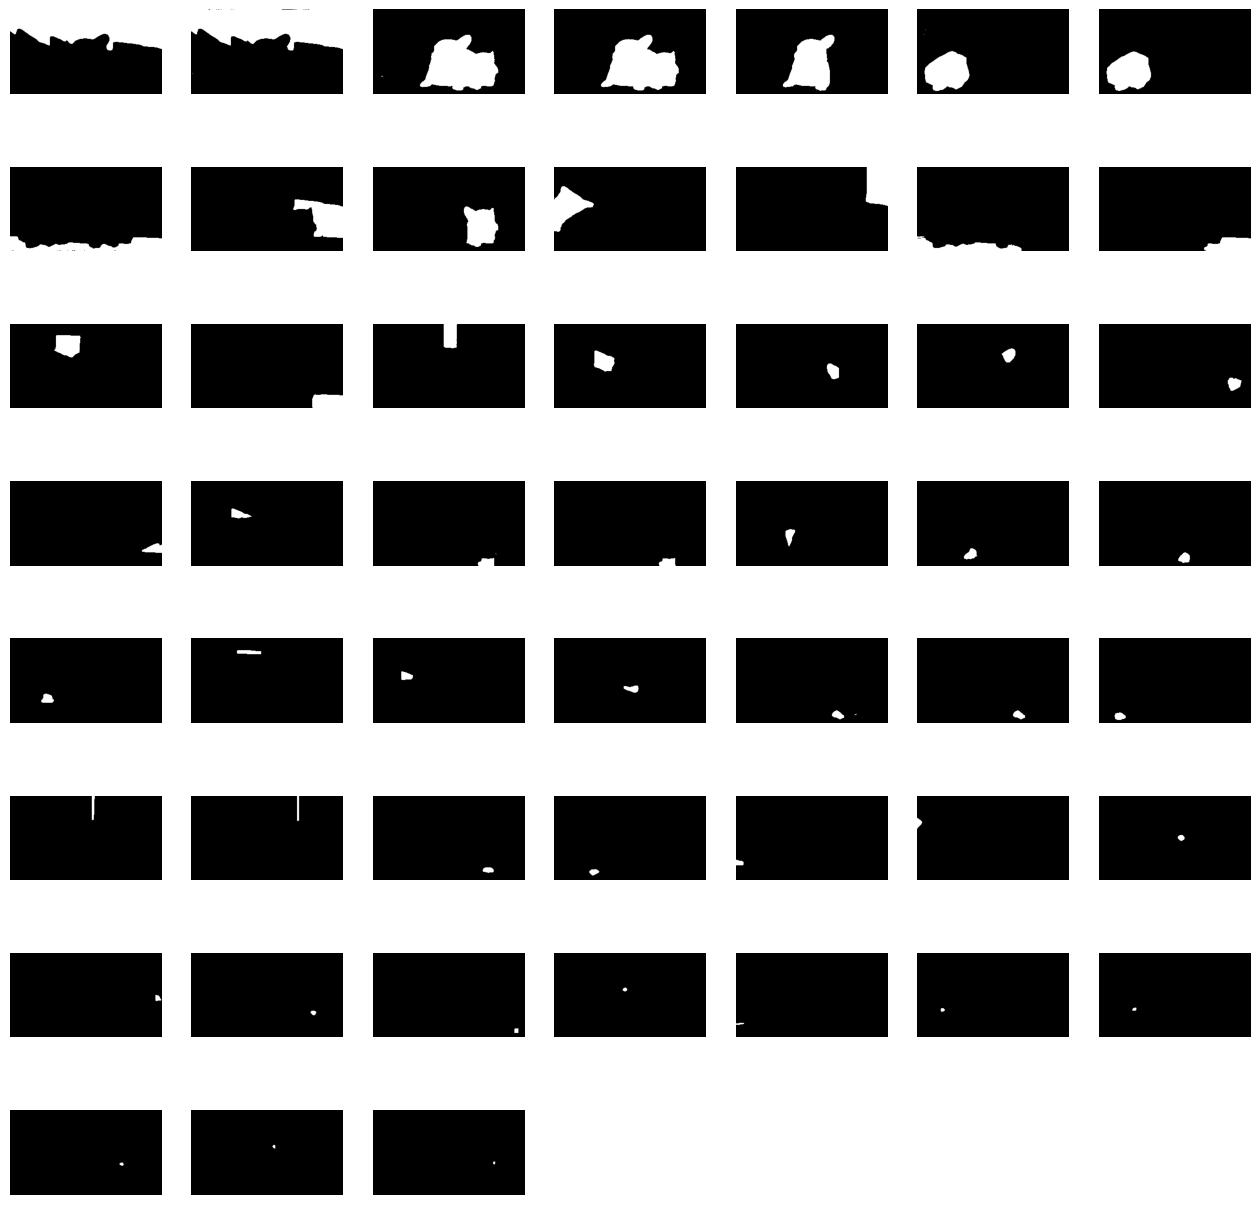

In [ ]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam_result, key=lambda x: x['area'], reverse=True)
]

num_rows = (len(masks) + 7) // 8

sv.plot_images_grid(
    images=masks,
    grid_size=(8, num_rows),
    size=(16, 16)
)

## <font color='#00FFFF'> **2. Segmentaci√≥n sem√°ntica** </font>

### **Descargamos Mask2Former desde HuggingFace**

In [ ]:
#No modifiques esta secci√≥n

In [ ]:
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-base-coco-panoptic")

In [ ]:
#Algunos labels del pre-entreno para buscar im√°genes relacionadas a estos

config = model.config
id2label = config.id2label

for id, label in list(id2label.items())[:10]:
  print(f"ID: {id}, Label: {label}")

ID: 0, Label: person
ID: 1, Label: bicycle
ID: 2, Label: car
ID: 3, Label: motorcycle
ID: 4, Label: airplane
ID: 5, Label: bus
ID: 6, Label: train
ID: 7, Label: truck
ID: 8, Label: boat
ID: 9, Label: traffic light


### **Sube cualquier imagen o im√°genes aqu√≠ para trabajar**

In [ ]:
uploaded = files.upload()
image_paths = []

for fn in uploaded.keys():
  if not os.path.exists('uploaded_images'):
    os.makedirs('uploaded_images')

  path = os.path.join('uploaded_images', fn)
  image_paths.append(path)

  with open(path, 'wb') as f:
    f.write(uploaded[fn])

  print('User uploaded file "{name}" with length {length} bytes and saved to {path}'.format(
      name=fn, length=len(uploaded[fn]), path=path))

# Guardamos los paths de cada image en image_path, descomenta la l√≠nea de abajo para verlos
#print("Saved image paths:", image_paths)

Saving images (1).jpg to images (1) (1).jpg
User uploaded file "images (1) (1).jpg" with length 7374 bytes and saved to uploaded_images/images (1) (1).jpg


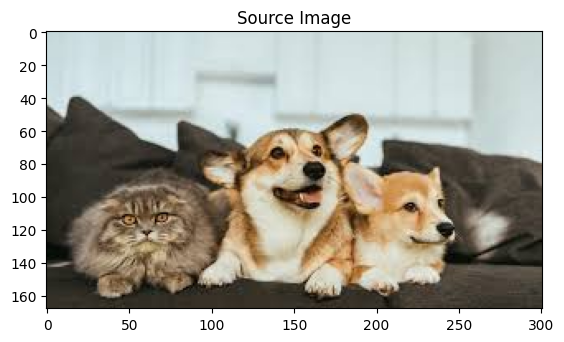

In [ ]:
# La posici√≥n del path depende del orden de subida de las imagenes a trabajar, si deseas cambiar la imagen,
# modifica el √≠ndice de la lista al path de la imagen a usar, no olvidar que los √≠ndices empiezan hasta 0
# y van hasta n-1 donde n es el n√∫mero de im√°genes

image = image_paths[0]
src_image = Image.open(image)
plt.imshow(src_image)
plt.title('Source Image')
plt.show() #Visualizaci√≥n de la imagen seleccionada

### **Obtenemos las m√°scaras de segmentaci√≥n de Mask2Former**

In [ ]:
inputs = processor(images=src_image, return_tensors="pt")

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
predicted_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[src_image.size[::-1]])[0]
print(predicted_map.shape)

torch.Size([168, 301])


In [ ]:
color_palette = [list(np.random.choice(range(256), size=3)) for _ in range(len(model.config.id2label))]
print(color_palette)

[[np.int64(246), np.int64(17), np.int64(87)], [np.int64(233), np.int64(4), np.int64(89)], [np.int64(140), np.int64(253), np.int64(152)], [np.int64(96), np.int64(63), np.int64(91)], [np.int64(137), np.int64(98), np.int64(234)], [np.int64(110), np.int64(255), np.int64(114)], [np.int64(253), np.int64(249), np.int64(71)], [np.int64(169), np.int64(59), np.int64(69)], [np.int64(74), np.int64(195), np.int64(181)], [np.int64(1), np.int64(104), np.int64(94)], [np.int64(195), np.int64(167), np.int64(177)], [np.int64(159), np.int64(63), np.int64(60)], [np.int64(74), np.int64(152), np.int64(32)], [np.int64(197), np.int64(84), np.int64(29)], [np.int64(144), np.int64(203), np.int64(58)], [np.int64(214), np.int64(150), np.int64(101)], [np.int64(121), np.int64(254), np.int64(195)], [np.int64(27), np.int64(157), np.int64(148)], [np.int64(66), np.int64(80), np.int64(139)], [np.int64(82), np.int64(34), np.int64(200)], [np.int64(149), np.int64(25), np.int64(250)], [np.int64(146), np.int64(253), np.int64(9

### **Visualizaci√≥n de Segmentaci√≥n Sem√°ntica**

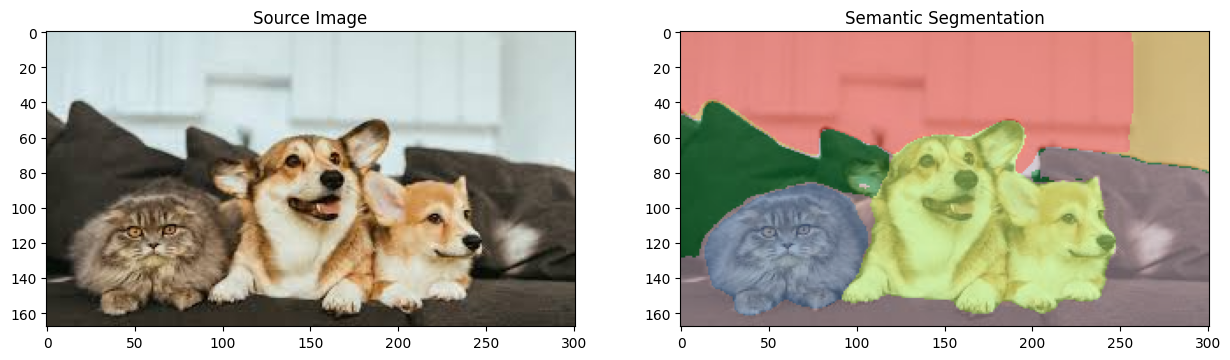

In [ ]:
seg = predicted_map # Cambio de nombre de una variable anterior
color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8)
palette = np.array(color_palette)
for label, color in enumerate(palette):
    color_seg[seg == label, :] = color
# Convert to BGR
color_seg = color_seg[..., ::-1]

img = np.array(src_image)
color_seg_resized = cv2.resize(color_seg, (img.shape[1], img.shape[0]))

# Imagen y m√°scara (NO modificar üôèüèº)
img = img * 0.5 + color_seg_resized * 0.5
img = img.astype(np.uint8)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

#Visualizaci√≥n de las im√°genes
axes[0].imshow(src_image)
axes[0].set_title('Source Image')
axes[1].imshow(img)
axes[1].set_title('Semantic Segmentation')

plt.show()

## <font color='#00FFFF'> **3. Segmentaci√≥n de instancias** </font>

### **Sube cualquier imagen o im√°genes aqu√≠ para trabajar**

In [ ]:
uploaded = files.upload()
image_paths = []

for fn in uploaded.keys():
  if not os.path.exists('uploaded_images'):
    os.makedirs('uploaded_images')

  path = os.path.join('uploaded_images', fn)
  image_paths.append(path)

  with open(path, 'wb') as f:
    f.write(uploaded[fn])

  print('User uploaded file "{name}" with length {length} bytes and saved to {path}'.format(
      name=fn, length=len(uploaded[fn]), path=path))

# Guardamos los paths de cada image en image_path, descomenta la l√≠nea de abajo para verlos
#print("Saved image paths:", image_paths)

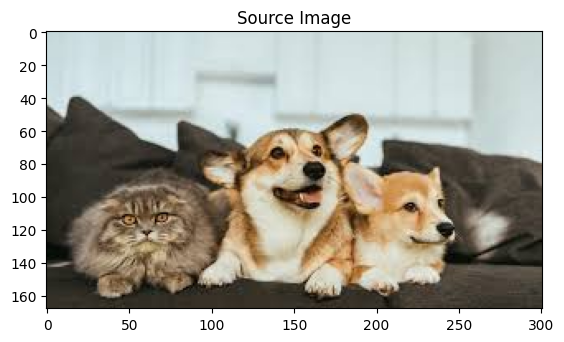

In [ ]:
# La posici√≥n del path depende del orden de subida de las imagenes a trabajar, si deseas cambiar la imagen,
# modifica el √≠ndice de la lista al path de la imagen a usar, no olvidar que los √≠ndices empiezan hasta 0
# y van hasta n-1 donde n es el n√∫mero de im√°genes

image = image_paths[0]
src_image = Image.open(image)
plt.imshow(src_image)
plt.title('Source Image')
plt.show() #Visualizaci√≥n de la imagen seleccionada

### **Obtenemos las m√°scaras de segmentaci√≥n de Mask2Former**

In [ ]:
inputs = processor(images=src_image, return_tensors="pt")

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
results = processor.post_process_instance_segmentation(outputs, target_sizes=[src_image.size[::-1]], threshold=0.9)[0]
print(results.keys())

dict_keys(['segmentation', 'segments_info'])


In [ ]:
#Obtenci√≥n de los IDs de las m√°scaras para revisarlas de forma individual

segment_to_label = {segment['id']: segment['label_id'] for segment in results["segments_info"]}

def get_available_segment_ids(results):

    segmentation = results['segmentation'].numpy()
    unique_ids = np.unique(segmentation)

    available_ids = [id for id in unique_ids]

    return available_ids

available_ids = get_available_segment_ids(results)
print("Available segment IDs:", [id.item() for id in available_ids])

Available segment IDs: [-1.0, 0.0, 1.0, 2.0]


Visualizing mask for: dog


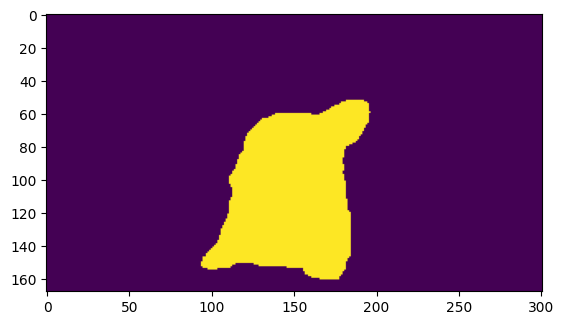

In [ ]:
# Visualizaci√≥n individual de m√°scaras
def get_mask(segment_id):
  if segment_id in segment_to_label:
    print("Visualizing mask for:", model.config.id2label[segment_to_label[segment_id]])

    mask = (results['segmentation'].numpy() == segment_id)
    visual_mask = (mask * 255).astype(np.uint8)
    visual_mask = Image.fromarray(visual_mask)

    plt.imshow(visual_mask)
    plt.show()
  else:
    print(f"Segment ID {segment_id} not found in segment_to_label. Skipping visualization.")
    return None

get_mask(segment_id=0)

### **Visualizaci√≥n Segmentaci√≥n de Instancias**

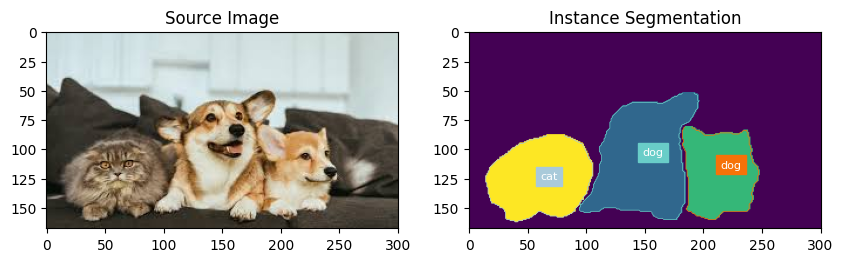

In [ ]:
def draw_instance_segmentation(segmentation, segments_info):

    fig, axes_arr = plt.subplots(1, 2, figsize=(10, 8)) # Create 2 subplots
    axes_img, axes_seg = axes_arr

    axes_img.imshow(src_image)
    axes_img.set_title('Source Image')
    axes_seg.imshow(segmentation)
    axes_seg.set_title('Instance Segmentation')

    instance_colors = {}
    for segment in segments_info:
        segment_id = segment['id']
        if segment_id not in instance_colors:
            instance_colors[segment_id] = [random.randint(0, 255) for _ in range(3)]

    for segment in segments_info:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        segment_label = model.config.id2label[segment_label_id]

        mask = (segmentation.numpy() == segment_id)

        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            axes_seg.plot(contour[:, 0, 0], contour[:, 0, 1], color=np.array(instance_colors[segment_id]) / 255, linewidth=0.5)

        x, y = np.mean(contour, axis=0)[0]
        axes_seg.text(x, y, segment_label, color='white', backgroundcolor=np.array(instance_colors[segment_id]) / 255, fontsize=8)

    plt.show()

#Visualizaci√≥n de las im√°genes
draw_instance_segmentation(**results)

## <font color='#00FFFF'> **Bibliograf√≠a** </font>

Piotr Skalski. (Jan 22, 2024). How to Use the Segment Anything Model (SAM). Roboflow Blog: https://blog.roboflow.com/how-to-use-segment-anything-model-sam/

Jacob Solawetz. (Apr 7, 2023). What is Segment Anything Model (SAM)? A Breakdown.. Roboflow Blog: https://blog.roboflow.com/segment-anything-breakdown/

Rogge, N. (2025). Tutorials. Github Repository: https://github.com/NielsRogge/Transformers-Tutorials

Cheng, B., Misra, I., Schwing, A. G., Kirillov, A., & Girdhar, R. (2022). Masked-attention Mask Transformer for Universal Image Segmentation. arXiv. https://arxiv.org/abs/2112.01527

Kirillov, A., Mintun, E., Ravi, N., Mao, H., Rolland, C., Gustafson, L., Xiao, T., Whitehead, S., Berg, A. C., Lo, W.-Y., Doll√°r, P., & Girshick, R. (2023). Segment Anything. arXiv. https://arxiv.org/abs/2304.02643